# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 3 decimal points
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")


## Loading the dataset

In [2]:
# import google drive and mount drive
from google.colab import drive
drive.mount('/content/drive/')

df_Load = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Loan_Modelling.csv")

Mounted at /content/drive/


In [3]:
# copying data to another variable to avoid any changes to original data
df = df_Load.copy()

## Data Overview

* Observations: we observer that-
   - The dataset has 5000 rows and 14 columns
   - All the 14 columns are numerical values. All are int64 datatypes with one exception which is the 'CCAvg' column which is a float64.
   - 'Zipcode' as a numerical column will be an issue for the analysis hence we will process it to be a categorical column ( in the data preprocessing section)
   - We also see that the following columns contain only 0's and 1's and therefore there is no need to perform get_dummies() in the preprocessing section for them - 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard'
   - We see that the 'education' column has negative number(s) as reflected in the minimum value in the statistical details. We will rectify this in the preprocessing section


* Sanity checks:
   - We see that there are no null values. Therefore there is no need for null value preprocessing.
   - Also there are no duplicate values. The customer 'ID' column also contains all unique values therefore there are no duplicates.

In [4]:
# Study the shape,info and statistical info of the data ( coded below across a few blocks)
print('Shape:', df.shape)

Shape: (5000, 14)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


In [6]:
print('\nStatistical details:\n',df.describe().T.to_string())


Statistical details:
                       count      mean      std       min       25%       50%       75%       max
ID                 5000.000  2500.500 1443.520     1.000  1250.750  2500.500  3750.250  5000.000
Age                5000.000    45.338   11.463    23.000    35.000    45.000    55.000    67.000
Experience         5000.000    20.105   11.468    -3.000    10.000    20.000    30.000    43.000
Income             5000.000    73.774   46.034     8.000    39.000    64.000    98.000   224.000
ZIPCode            5000.000 93169.257 1759.455 90005.000 91911.000 93437.000 94608.000 96651.000
Family             5000.000     2.396    1.148     1.000     1.000     2.000     3.000     4.000
CCAvg              5000.000     1.938    1.748     0.000     0.700     1.500     2.500    10.000
Education          5000.000     1.881    0.840     1.000     1.000     2.000     3.000     3.000
Mortgage           5000.000    56.499  101.714     0.000     0.000     0.000   101.000   635.000
Persona

In [7]:
df.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.600,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.500,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.700,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.000,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.400,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.500,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.300,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.600,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.900,3,0,1,0,0,0,0


In [8]:
df.tail(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.000,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.900,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.500,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.670,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.000,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.900,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.400,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.300,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.500,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.800,1,0,0,0,0,1,1


In [9]:
# checking for null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
# checking for duplicate values
df.duplicated().sum()

0

In [11]:
# checking for duplicate values specifically of the customer "ID" column to ensure there are no duplicates
df['ID'].nunique()

5000

## Exploratory Data Analysis.

We will perform univariate analysis on all the variables and provide observations on their distributions. (histograms, boxplots, countplot etc).

We will also do multivariate analysis to explore relationships between the important variables in the dataset (ie explore relations between numerical variables as well as relations between numerical and categorical variables)

In [12]:
# The below code is a function that we will use subsequently to create histograms and boxplots together
def histogram_boxplot(data, feature, figsize=(7, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
#The below code is a function to create labeled barplots. We will use this function also in analysis that is to follow.

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    # Get the current figure and change its width to 15 inches and its height to 2 inches
    fig = plt.gcf()
    fig.set_figwidth(3)
    fig.set_figheight(5)

    plt.tight_layout()

    plt.show()  # show the plot

In [14]:
#The below code is a function to plot Cumulative distribution fuction of numerical variables. We may use this function also in analysis that is to follow.
def CDF_view(data):
  """
    data: dataframe
  """
  no_of_cols = data.shape[1]

  fig, axes = plt.subplots(round(no_of_cols/2), 2, figsize=(20, 20))
  fig.suptitle("CDF plot of numerical variables", fontsize=15)

  counter = 0

  for i in range(round(no_of_cols/2)):
      sns.ecdfplot(data=df, ax=axes[i][0], x=df.columns.tolist()[counter])
      counter = counter + 1
      if counter != no_of_cols:
          sns.ecdfplot(data=df, ax=axes[i][1], x=df.columns.tolist()[counter])
          counter = counter + 1
      else:
          pass

  fig.tight_layout(pad=2.0)

UNIVARIATE ANALYSIS:

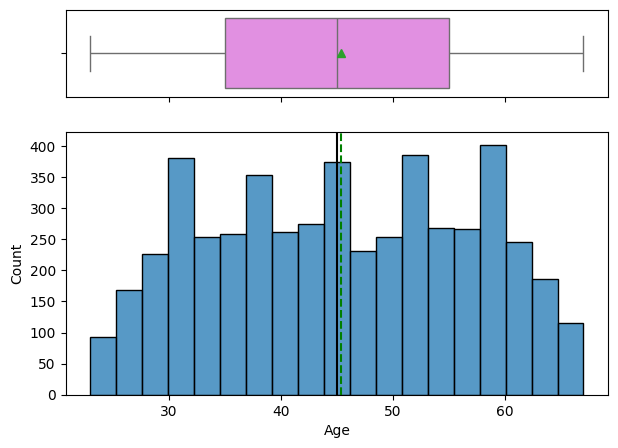

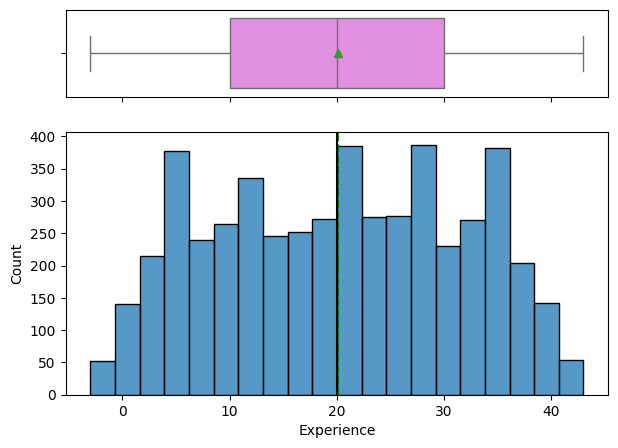

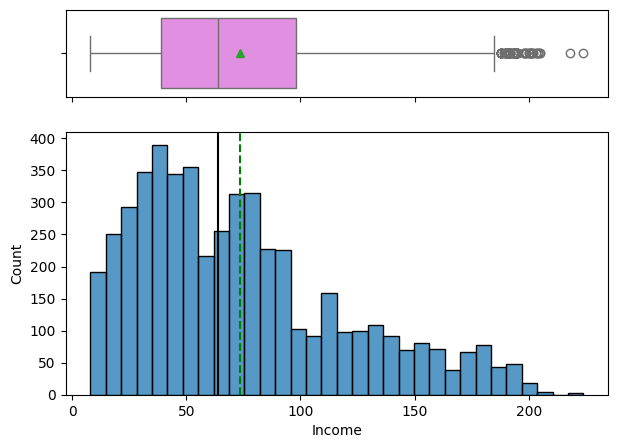

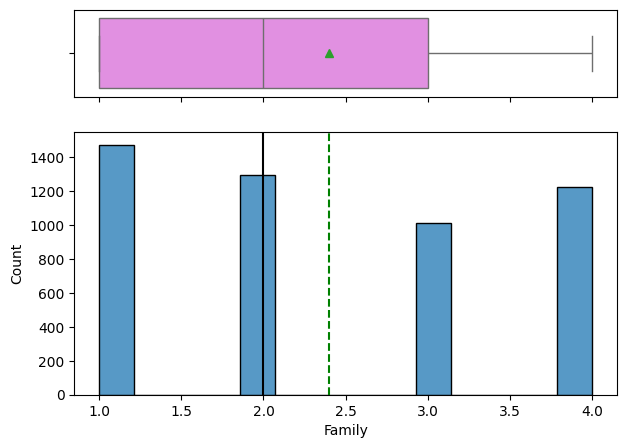

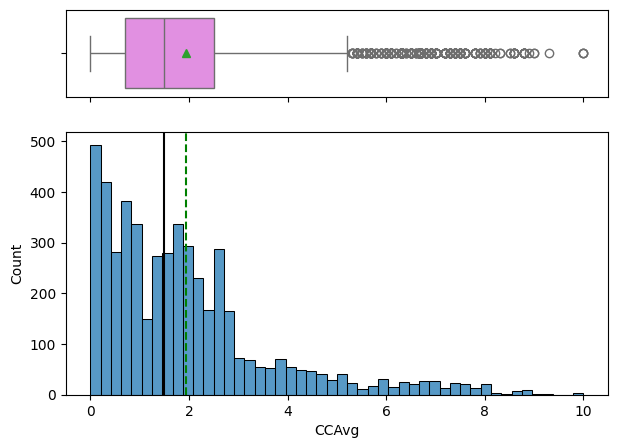

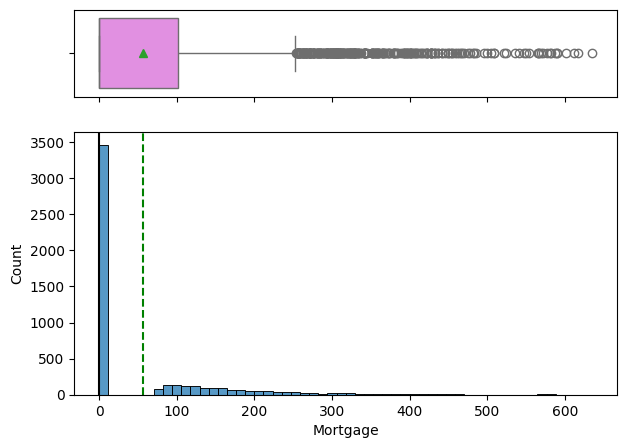

In [15]:
# Firstly study the boxplots and histograms of all the numerical variables.
#Drop the non essential columns in the df to filter for only key variables ie drop the columns 'ID','ZIPCode','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard'

df_selectcols = df.copy()
df_selectcols = df_selectcols.drop(columns = ['ID','ZIPCode','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard'],axis = 1)
for i in df_selectcols.columns.to_list():
  histogram_boxplot(df_selectcols,i)

In [16]:
# Find the percentage of customers who have mortgage. Also find % of customers who have a NON-ZERO CCAvg.
print(df[df['Mortgage']>0].shape[0]*100/df.shape[0],'% of customers have mortgage')
print(df[df['CCAvg']>0].shape[0]*100/df.shape[0],'% of customers have credit card avg. spend greater than Zero')


30.76 % of customers have mortgage
97.88 % of customers have credit card avg. spend greater than Zero


Observations:
- Age: Mean and median are very close at ~45 yrs. 50% of the age rage is between 35-55 yrs
- Experience: Mean and median are very close at ~20 yrs. 50% of the age rage is between 10-30 yrs experience
- Income: Mean: 73.78k ; Median: 64k. Income is right skewed pushing the mean to the right. There are outliers beyond the 175k dollars mark
- Family: Right skewed with outliers  containing more than 2 members.Median family size is 2 members
- CCAvg: Right skewed with outliers at greater than 5K dollars spending per month.Mean: 1.94k ; Median: 1.5k dollars. Also 97.9% of customers have a non-zero CCAvg spend.
- Mortgage: Right skewed with outliers at greater than 250K dollars spending per month. Mean: 56.5 ; Median: 0. Also only 30.76% customer have mortgage.

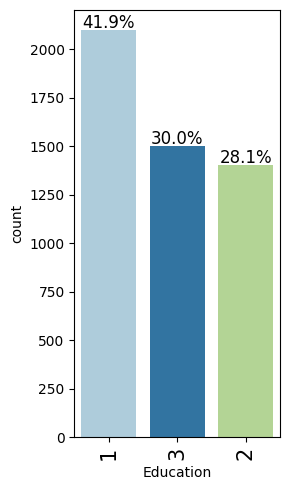

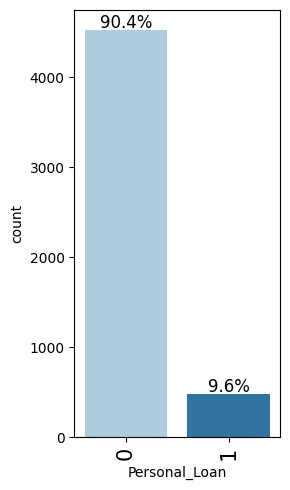

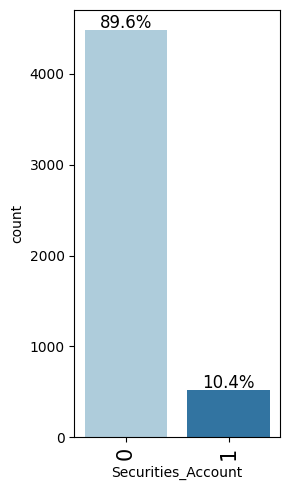

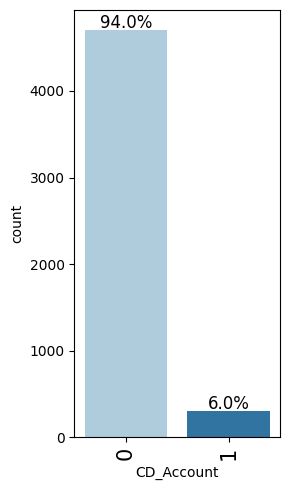

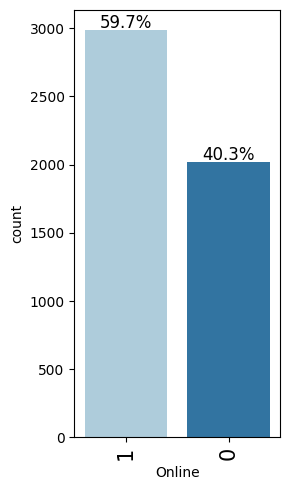

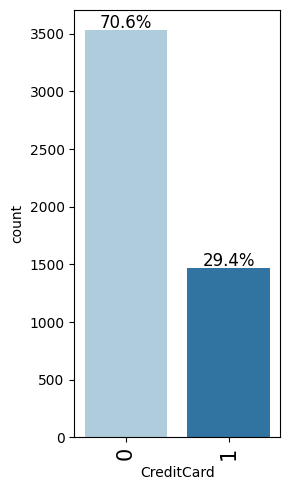

In [16]:
#Create barplots for all categorical variables -
df_with_cat_cols = df[['Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']].copy()
for i in df_with_cat_cols.columns.to_list():
  labeled_barplot(df_with_cat_cols,i,perc=True)

Observations:
- Education: Close to 42% of customers are Undergrad. About 30% each, are Grads and Advanced/Professional
- Personal Loan: 9.6% of customers have availed personal loan ( as was already mentioned in the business case)
- Securities Account: Close to 90% of customers do not have securities account
- CD Account: 94% customers do not have CD account
- Online: ~60% customers do not use online banking facilities
- Credit card: ~70% do not have a credit card issued by any other bank

MULTIVARIATE ANALYSIS:

In [19]:
### The below code is a function to plot stacked barplot with target variable. We will use this in the bivariate analysis that will follow further down.

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True, normalize='index')#.sort_values(by=sorter, ascending=False)
    print(tab1)
    print("-" * 120)

    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(by=sorter, ascending=False)
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    fig = plt.gcf()
    fig.set_figwidth(1.5)
    fig.set_figheight(3)

    plt.show()

In [22]:
### The below code is a function to plot distributions wrt target ( ie 'personal loan') variable. We will use this in the bivariate analysis that will follow further down.

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(8, 6))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of "+target+" for "+target+" = "+str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of "+target+" for "+target+" = "+str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t "+target)
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t "+target)
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

Personal_Loan     0     1
Education                
1             0.956 0.044
2             0.870 0.130
3             0.863 0.137
All           0.904 0.096
------------------------------------------------------------------------------------------------------------------------


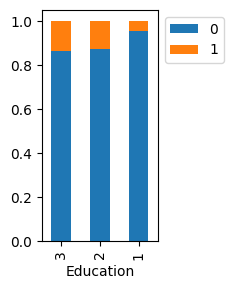

Personal_Loan          0     1
Securities_Account            
0                  0.906 0.094
1                  0.885 0.115
All                0.904 0.096
------------------------------------------------------------------------------------------------------------------------


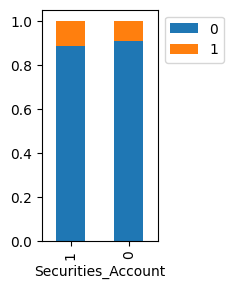

Personal_Loan     0     1
CD_Account               
0             0.928 0.072
1             0.536 0.464
All           0.904 0.096
------------------------------------------------------------------------------------------------------------------------


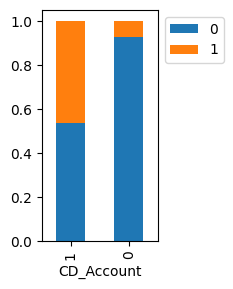

Personal_Loan     0     1
Online                   
0             0.906 0.094
1             0.902 0.098
All           0.904 0.096
------------------------------------------------------------------------------------------------------------------------


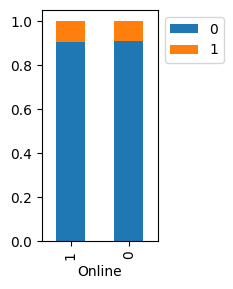

Personal_Loan     0     1
CreditCard               
0             0.905 0.095
1             0.903 0.097
All           0.904 0.096
------------------------------------------------------------------------------------------------------------------------


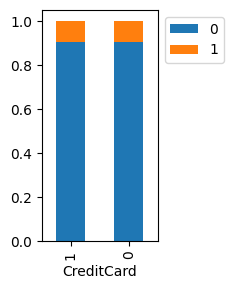

In [19]:
# Study the relationship between the target varaible (ie Personal Loan) and the other categorial variables

df_for_study = df[['Education','Securities_Account','CD_Account','Online','CreditCard','Personal_Loan']].copy()

for i in df_for_study.columns.to_list():
  if(i != 'Personal_Loan'):
    stacked_barplot(df_for_study, i, 'Personal_Loan')



Observations:
	- We see that ~13.7% of customers in Advanced/professional category have availed personal loan. Similarly ~13% of Grads have availed loans as opposed to only 4% of undergrads who have availed loans
  - 46% of customers who have CD account have availed personal loan as opposed to only 7% of customer who do not have a CD account have availed loan
  - Customers using online facilities seem to have no bearing with availing personal loan. In both cases (online- yes and no) only 9%customer have availed loan
  - Also Customers with or without credit cards from other banks seem to have no bearing with availing personal loan. In both cases only approx 9.6% customer have availed loan


In [20]:
# study if the target (ie Personal_Loan column) has any relationship with the ZIPCode
df['ZIPCode'].value_counts(normalize=True).sort_values(ascending=False)
pd.crosstab(index = df['ZIPCode'],columns=df['Personal_Loan'],margins=True,normalize=True).sort_values('All',ascending=False)


Personal_Loan,0,1,All
ZIPCode,,,
All,0.904,0.096,1.000
94720,0.030,0.004,0.034
94305,0.023,0.003,0.025
95616,0.022,0.001,0.023
90095,0.013,0.002,0.014
...,...,...,...
94598,0.000,0.000,0.000
90813,0.000,0.000,0.000
94970,0.000,0.000,0.000


Observation:
- We observe that first of all, customers are largely spread across zip codes. The largest base of customers in a single zip code is just ~3.4% of the total customer base for the bank. Within this zip code, only about 0.4% of the customers have availed loan.  

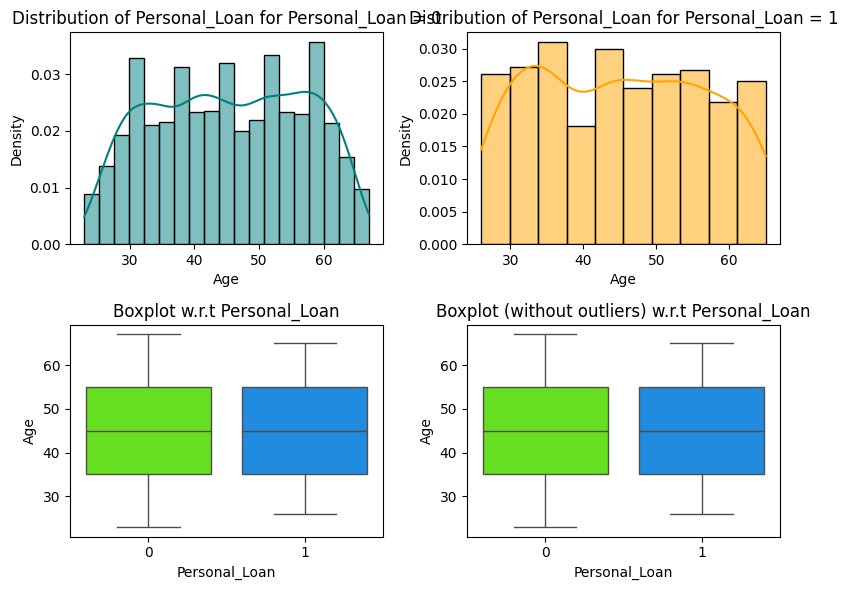

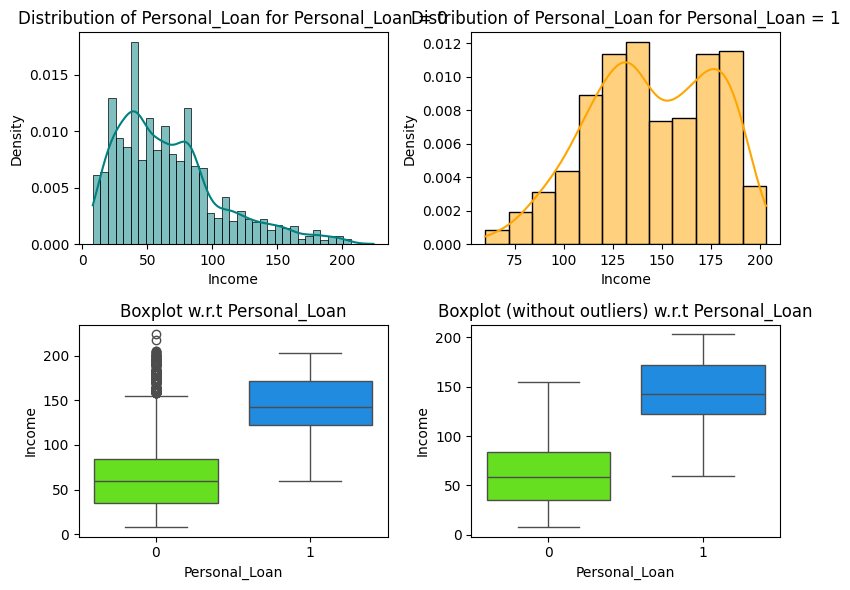

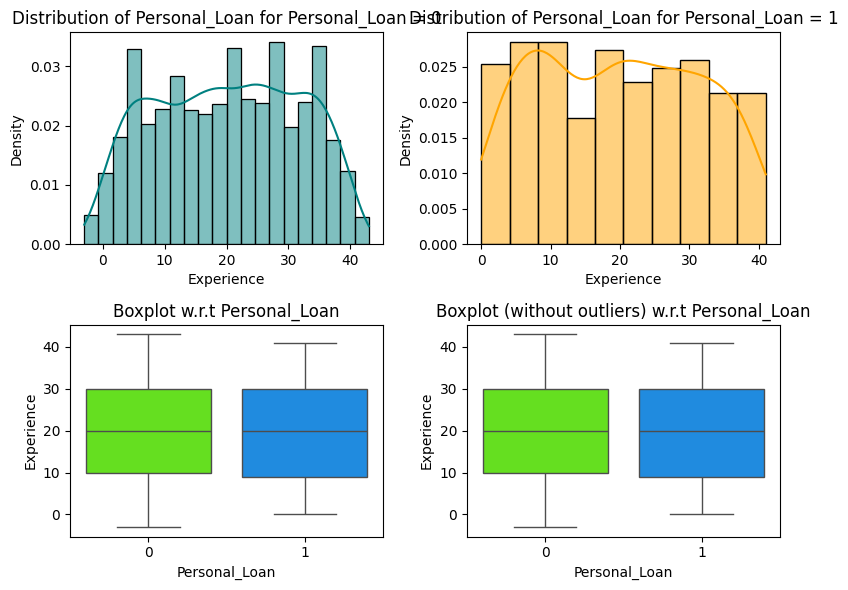

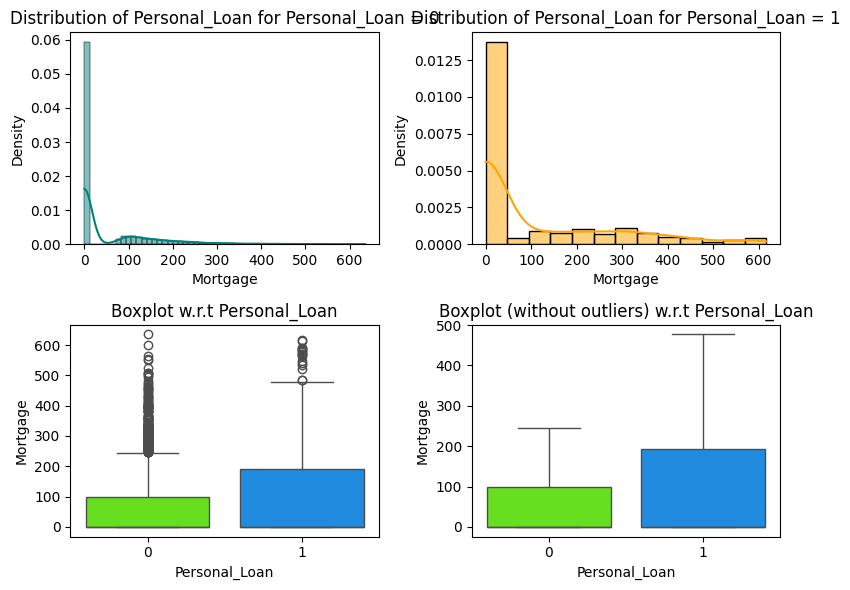

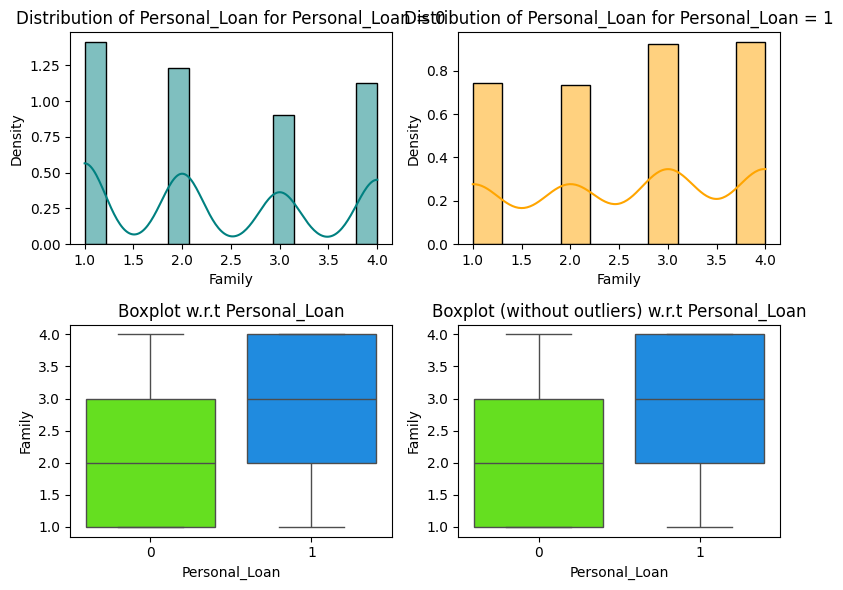

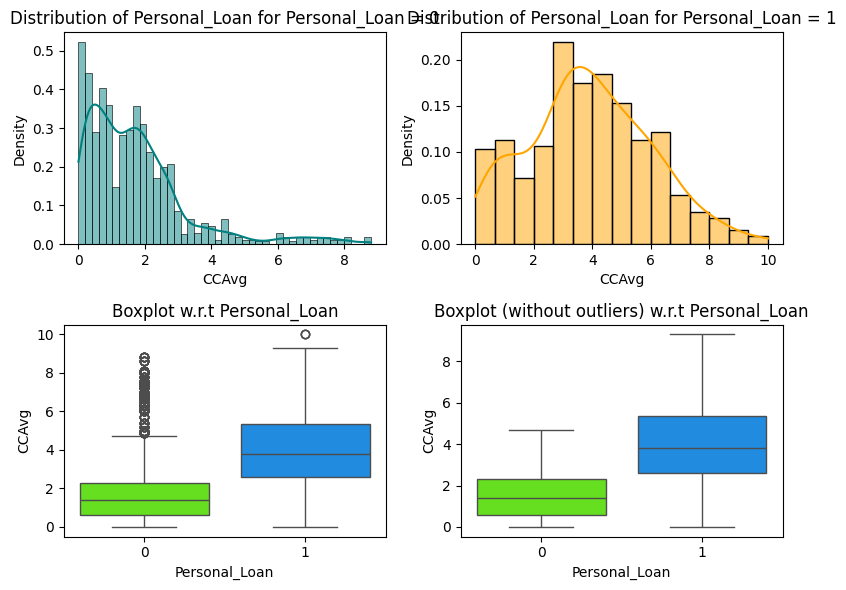

In [23]:
# study the relationship between target variable (ie Personal_Loan, a categorical variable) and the numerical variables
df_selectcols = df[['Personal_Loan','Age','Income','Experience','Mortgage','Family','CCAvg']].copy()
for i in df_selectcols.columns.to_list():
  if(i != 'Personal_Loan'):
    distribution_plot_wrt_target(df_selectcols, i, 'Personal_Loan')


Observations:
- On review of graphs above, it seem that Age does not have any bearing on a customer taking/not taking a personal loan from the bank
- The graphs of Income above indicate that customers who have taken personal loan have higher incomes with their median at 150k as opposed to median income of customers without personal loan being at about 60k
- The experience graphs above indicate that it does not have any bearing on a customer taking or not taking a personal loan from the bank.
- The range of value of mortgage loans is almost twice in cases where customer have taken personal loans as opposed to where they have not taken loans indicating that if the size of mortgage is higher, there is more likelyhood of customer taking the personal loan.
- Based on the graph above, Families of larger sizes (ie >2 members) are likely to take personal loans as opposed to families of size 2
- Based on graph above, Customers with higher CCAvg spend are more likely to taken personal loan as oppsed to those with lower CCAvg.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

## Model Building

### Model Evaluation Criterion

*


### Model Building

### Model Performance Improvement

## Model Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___